In [ ]:
#General Packages
import pandas as pd
import torch
import torch.nn.functional as F
import ast
import scipy.stats as stats


#Statistical tests
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Plot
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("../results/generation_metadata.csv")
df

,model,attack,true_class,target_class,original_pred_class,adversarial_pred_class,first_success_iter,attack_successful,psnr_score,ssim_score,ergas_score,adversarial_image_path,original_probs,adversarial_probs,dataset_index
0,cifar10_resnet20,fgsm,0,1,0,1,2.0,True,65.954201,0.999694,2.116059e+01,results/adversarial_images/adv_fgsm_src0_tgt1_...,"[0.5657652616500854, 0.00042795829358510673, 0...","[1.6045102746442552e-11, 1.0, 1.51032519823957...",3
1,cifar10_resnet20,fgsm,0,2,0,2,1.0,True,66.643494,0.999728,1.939236e+01,results/adversarial_images/adv_fgsm_src0_tgt2_...,"[0.5657652616500854, 0.00042795829358510673, 0...","[1.8208290506870756e-13, 1.872570803659098e-14...",3
2,cifar10_resnet20,fgsm,0,3,0,3,2.0,True,66.778648,0.999747,1.936389e+01,results/adversarial_images/adv_fgsm_src0_tgt3_...,"[0.5657652616500854, 0.00042795829358510673, 0...","[1.1564458243150605e-15, 7.034808526722516e-15...",3
3,cifar10_resnet20,fgsm,0,4,0,4,4.0,True,65.881126,0.999691,2.135495e+01,results/adversarial_images/adv_fgsm_src0_tgt4_...,"[0.5657652616500854, 0.00042795829358510673, 0...","[5.68821899304961e-12, 4.9450651906646215e-12,...",3
4,cifar10_resnet20,fgsm,0,5,0,5,4.0,True,66.494148,0.999710,1.975791e+01,results/adversarial_images/adv_fgsm_src0_tgt5_...,"[0.5657652616500854, 0.00042795829358510673, 0...","[6.877660663207052e-10, 3.936369841195386e-10,...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,cifar10_resnet20,cw,9,4,9,9,5.0,True,72.964874,0.999943,5.731870e+06,results/adversarial_images/adv_cw_src9_tgt4_id...,"[1.1389509779746732e-08, 1.754766465467128e-08...","[4.0848854609976115e-07, 2.5163251393678365e-0...",34
1346,cifar10_resnet20,cw,9,5,9,9,1.0,True,80.456924,0.999990,2.419324e+06,results/adversarial_images/adv_cw_src9_tgt5_id...,"[1.1389509779746732e-08, 1.754766465467128e-08...","[4.73102179654461e-09, 3.990787256213935e-09, ...",34
1347,cifar10_resnet20,cw,9,6,9,9,3.0,True,77.360107,0.999979,3.455692e+06,results/adversarial_images/adv_cw_src9_tgt6_id...,"[1.1389509779746732e-08, 1.754766465467128e-08...","[6.239093863769085e-08, 2.071508120593535e-08,...",34
1348,cifar10_resnet20,cw,9,7,9,9,6.0,True,74.080467,0.999956,5.041002e+06,results/adversarial_images/adv_cw_src9_tgt7_id...,"[1.1389509779746732e-08, 1.754766465467128e-08...","[1.3863801662239439e-08, 1.087225776075229e-08...",34


In [ ]:
df["attack_successful"].unique()

array([ True, False])

In [52]:
df = df.dropna()

In [53]:
len(df['dataset_index'].unique())

50

In [ ]:
# Define and fit the model
model = smf.mixedlm("psnr_score ~ attack + C(target_class)", data=df, groups=df["dataset_index"]).fit()

# Print the summary
print(model.summary())


                     Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         psnr_score
No. Observations:         1230            Method:                     REML      
No. Groups:               50              Scale:                      25.2903   
Min. group size:          18              Log-Likelihood:             inf       
Max. group size:          27              Converged:                  Yes       
Mean group size:          24.6                                                  
--------------------------------------------------------------------------------
                     Coef.    Std.Err.     z    P>|z|     [0.025       0.975]   
--------------------------------------------------------------------------------
Intercept             4.278 7857030.283   0.000 1.000 -15399492.102 15399500.658
attack[T.fgsm]       -9.755       0.339 -28.790 0.000       -10.419       -9.091
attack[T.pgd]         3.165       0.368   8.612 0.

C:\Users\celin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\celin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\Users\celin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
C:\Users\celin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodel

Pairwise post-hoc tests: 

In [60]:
tukey = pairwise_tukeyhsd(endog=df['psnr_score'],
                          groups=df['attack'],
                          alpha=0.05)

print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
    cw   fgsm  -9.8198   0.0 -10.6825 -8.9572   True
    cw    pgd    3.202   0.0   2.2779  4.1261   True
  fgsm    pgd  13.0218   0.0   12.105 13.9386   True
----------------------------------------------------


In [61]:
for target in df['target_class'].unique():
    print(f"\nTarget class: {target}")
    tukey = pairwise_tukeyhsd(endog=df[df['target_class'] == target]['psnr_score'],
                              groups=df[df['target_class'] == target]['attack'],
                              alpha=0.05)
    print(tukey.summary())


Target class: 1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    cw   fgsm  -3.8343   0.0 -4.3442 -3.3244   True
    cw    pgd   9.3347   0.0  8.7965   9.873   True
  fgsm    pgd   13.169   0.0 12.6815 13.6566   True
---------------------------------------------------

Target class: 2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    cw   fgsm  -6.9506   0.0 -7.6146 -6.2866   True
    cw    pgd   6.1716   0.0  5.4872   6.856   True
  fgsm    pgd  13.1222   0.0 12.4377 13.8066   True
---------------------------------------------------

Target class: 3
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
    cw   fgsm -16.7869    0.0 -20.2946 -13.2792   True
 

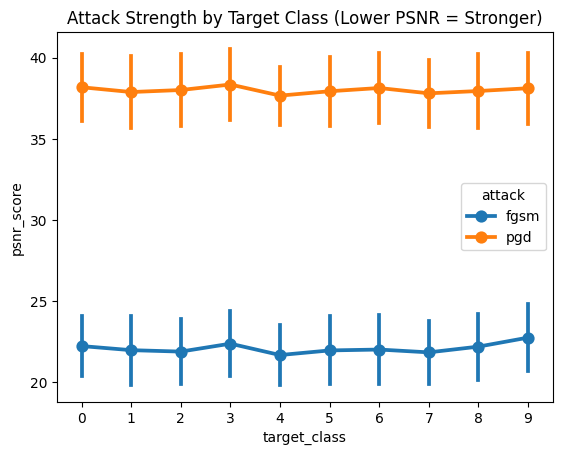

In [ ]:
sns.pointplot(data=df, x='target_class', y='psnr_score', hue='attack', errorbar='sd')
plt.title("Attack Strength by Target Class (Lower PSNR = Stronger)")
plt.show()

### KL divergence in probability distribution

In [63]:
df["original_probs"] = df["original_probs"].apply(ast.literal_eval)
df["adversarial_probs"] = df["adversarial_probs"].apply(ast.literal_eval)

C:\Users\celin\AppData\Local\Temp\ipykernel_532\4037593332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["original_probs"] = df["original_probs"].apply(ast.literal_eval)
C:\Users\celin\AppData\Local\Temp\ipykernel_532\4037593332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["adversarial_probs"] = df["adversarial_probs"].apply(ast.literal_eval)


In [64]:
def kl_divergence(p, q):
    # Convert to tensors
    p = torch.tensor(p, dtype=torch.float32)
    q = torch.tensor(q, dtype=torch.float32)

    # Add small epsilon to avoid log(0)
    epsilon = 1e-8
    p = p + epsilon
    q = q + epsilon

    return F.kl_div(q.log(), p, reduction="sum").item()  

In [66]:
df["kl_divergence"] = df.apply(lambda row: kl_divergence(row["original_probs"], row["adversarial_probs"]), axis=1)


C:\Users\celin\AppData\Local\Temp\ipykernel_532\3706757358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["kl_divergence"] = df.apply(lambda row: kl_divergence(row["original_probs"], row["adversarial_probs"]), axis=1)


In [67]:
print(df.groupby("attack")["kl_divergence"].mean())

attack
cw       0.436833
fgsm    17.802873
pgd      9.864644
Name: kl_divergence, dtype: float64


In [68]:
print(df[["kl_divergence", "psnr_score"]].corr())

               kl_divergence  psnr_score
kl_divergence       1.000000   -0.472713
psnr_score         -0.472713    1.000000


In [69]:
model = smf.mixedlm("kl_divergence ~ attack", data=df, groups=df["dataset_index"])
result = model.fit()

print(result.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: kl_divergence
No. Observations: 1230    Method:             REML         
No. Groups:       50      Scale:              11.3649      
Min. group size:  18      Log-Likelihood:     -3273.3101   
Max. group size:  27      Converged:          Yes          
Mean group size:  24.6                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.442    0.227  1.950 0.051 -0.002  0.886
attack[T.fgsm]   17.361    0.227 76.527 0.000 16.916 17.806
attack[T.pgd]     9.268    0.245 37.780 0.000  8.788  9.749
Group Var         1.258    0.105                           



# Succesrate

In [79]:
# Create contingency table: rows = attack type, columns = success (True/False)
contingency = pd.crosstab(df['attack'], df['attack_successful'])

print("Contingency Table:\n", contingency)

# Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("\nChi-squared Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4e}")
print("\nExpected Frequencies:\n", pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))


Contingency Table:
 attack_successful  False  True 
attack                         
cw                    16    434
fgsm                   0    450
pgd                  104    346

Chi-squared Test Results:
Chi2 Statistic: 172.0976
Degrees of Freedom: 2
P-value: 4.2608e-38

Expected Frequencies:
 attack_successful  False  True 
attack                         
cw                  40.0  410.0
fgsm                40.0  410.0
pgd                 40.0  410.0
